In [25]:
# General

import numpy as np
import pandas as pd
import re
import os
import pickle
import random

# EDA

import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter

#NLP
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /Users/colinhong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/colinhong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv("spam.csv", encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.drop(data.columns[[2,3,4]], axis = 1, inplace = True)
data.columns = ['class','message']
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data['no_of_chars'] = data['message'].apply(len)
data['no_of_words'] = data['message'].apply(lambda x: len(nltk.word_tokenize(x)))
data['no_of_sentences'] = data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
data['Spam'] = data['class'].map({'ham': 0, 'spam': 1})

data.head()

,class,message,no_of_chars,no_of_words,no_of_sentences,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0
1,ham,Ok lar... Joking wif u oni...,29,8,2,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1
3,ham,U dun say so early hor... U c already then say...,49,13,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0


### Count plot

In [7]:
temp = pd.DataFrame()
temp['Class'] = ['Ham','Spam']
temp['Count'] = [len(data[data['class'] == 'ham']), len(data[data['class'] == 'spam'])]
temp = temp.sort_values(by = ['Count'], ascending = False)
fig = px.bar(temp, x = 'Class', y = 'Count', 
             color = "Class", text_auto='', width = 600, 
             color_discrete_sequence = ["teal", "gray"],
             template = 'plotly_dark',
            title = "Count Plot")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size=12, textangle = 0, textposition = "outside", cliponaxis = False)
fig.show()

## Exploring Number of Characters per Message

In [8]:
fig = px.histogram(data, x = 'no_of_chars', color = 'class', 
                   template = 'plotly_dark', 
                   color_discrete_sequence = ["teal", "gray"],
                   title = "Histogram for Ham vs Spam based on Number of Characters per Message",
                   width = 1000)

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [9]:
fig = px.strip(data, x = 'no_of_chars', 
                    color = 'class', template = 'plotly_dark', 
                    color_discrete_sequence = ["teal", "gray"],
                    title = "Strip plot for Ham vs Spam based on Number of Characters per Message",
                    width=1000)
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.show()

## Exploring Number of Words per Message

In [10]:
fig = px.histogram(data, x = 'no_of_words', color = 'class', 
                   template = 'plotly_dark', 
                   color_discrete_sequence = ["teal", "gray"],
                   title = "Histogram for Ham vs Spam based on Number of Words per Message",
                   width = 1000)

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [11]:
fig = px.strip(data, x = 'no_of_words', 
                    color = 'class', template = 'plotly_dark', 
                    color_discrete_sequence = ["teal", "gray"],
                    title = "Strip plot for Ham vs Spam based on Number of Words per Message",
                    width=1000)
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.show()

## Exploring Number of Sentences per Message

In [12]:
fig = px.histogram(data, x = 'no_of_sentences', 
                    color = 'class', template = 'plotly_dark', 
                    color_discrete_sequence = ["teal", "gray"],
                    title = "Histogram for Ham vs Spam based on Number of Sentences per Message")
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [13]:
fig = px.strip(data, x = 'no_of_sentences', 
                    color = 'class', template = 'plotly_dark', 
                    color_discrete_sequence = ["teal", "gray"],
                    title = "Strip plot for Ham vs Spam based on Number of Sentences per Message",
                    width=1000)
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.show()

## Correlation Matrix

In [14]:
corrData = data[["no_of_chars", "no_of_words", "no_of_sentences"]]
corrData.head()

,no_of_chars,no_of_words,no_of_sentences
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1


In [15]:

fig = px.imshow(corrData.corr(), text_auto = True, color_continuous_scale = 'blues', template = 'plotly_dark', title = "Correlation Matrix")
fig.show()

## Word Count

In [16]:
def word_count_plot(data, title):
    word_counter = Counter([word for sentence in data for word in sentence.split()])
    most_count = word_counter.most_common(30)
    most_count = pd.DataFrame(most_count, columns = ['Word', 'Count']).sort_values(by = "Count")
    most_count = most_count.sort_values(by = 'Count', ascending = False)
    
    fig = px.bar(most_count, x = 'Word', y = 'Count', color = "Count", text_auto = '', template = 'plotly_dark', title = title)
    fig.update_xaxes(showgrid = False)
    fig.update_yaxes(showgrid = False, showticklabels = False)
    fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
    fig.show()

In [17]:
word_count_plot(data["message"], "Word Count Plot Before Stemming")

### Stemming
An NLP technique which reduces words to their basic form or stem, which may or may not be a legitimate word in the language. This aids in the preprocessing of text, words, and documents for text normalization

In [29]:
corpus = []
ps = PorterStemmer()

for i in range(len(data)):
    msg = re.sub('[^a-zA-Z]', ' ', data['message'][i]) 
    msg = msg.lower()
    msg = msg.split()
    msg = [ps.stem(word) for word in msg if not word in stopwords.words('english')] # Stemming & Stopwords Removal
    msg = ' '.join(msg)
    corpus.append(msg)

In [38]:
for sentence in random.sample(corpus, 5):
    print(f"Sentence {corpus.index(sentence)}: {sentence}")

Sentence 4753: ok lor u wan go look u
Sentence 4319: hey mr go sea view coupl gay mean game give bell ya finish
Sentence 98: hi wk ok hol ye bit run forgot hairdress appoint four need get home n shower beforehand caus prob u ham
Sentence 4264: lt decim gt common car better buy china asia find less expens holla
Sentence 460: u go phone gonna die stay


In [40]:
data['corpus'] = corpus
data.head()


,class,message,no_of_chars,no_of_words,no_of_sentences,Spam,corpus
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,nah think goe usf live around though


In [41]:
store = pd.HDFStore('store.h5')
store['data_stemmed'] = data # save stemmed data
store['data_stemmed'] # load it

,class,message,no_of_chars,no_of_words,no_of_sentences,Spam,corpus
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,nah think goe usf live around though
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4,1,nd time tri contact u u pound prize claim easi...
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1,0,b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,0,piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,0,guy bitch act like interest buy someth els nex...


In [49]:
store.close()

In [42]:
word_count_plot(corpus, "Word Count Plot After Stemming")

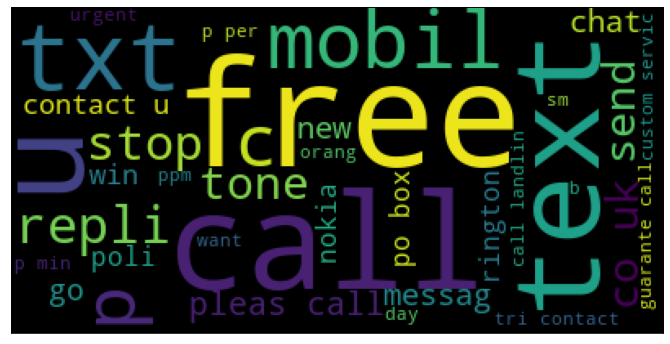

In [45]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'black')
spam_wc = wc.generate(data[data['class'] == 'spam']['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(spam_wc);

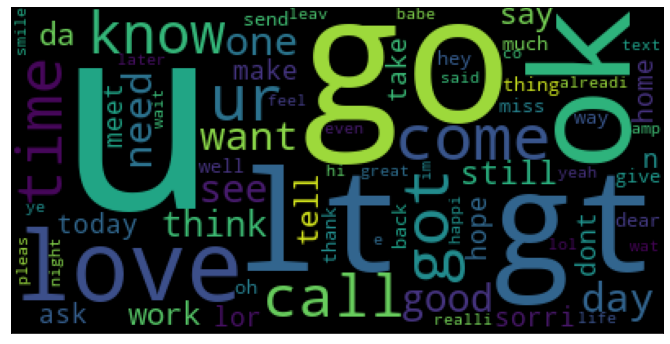

In [46]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'black')
spam_wc = wc.generate(data[data['class'] == 'ham']['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(spam_wc);

In [48]:
spam_corpus = []

for msg in data[data['class'] == 'spam']['corpus'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

temp = pd.DataFrame(Counter(spam_corpus).most_common(20), columns = ['Word', 'Count'])

fig = px.bar(temp, x = 'Word', y = 'Count', color = "Count", text_auto = '', template = 'plotly_dark', title = 'Count Plot for Spam Words')
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False, showticklabels = False)
fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
fig.show()